In [1]:
import datastore

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

spot = datastore.getSpotPrice()

cons_gwh = datastore.getConsumptionGWh()

nuclear_finland_germany_mwh = datastore.getHourlyProduction_nuclear_EU()
germany_all = datastore.getHourlyProduction_Germany_all()

production_se1_mwh = datastore.getAllSE1ProductionMWh()
production_se2_mwh = datastore.getAllSE2ProductionMWh()
production_se3_mwh = datastore.getAllSE3ProductionMWh()
production_se4_mwh = datastore.getAllSE4ProductionMWh()

otherData = datastore.getOtherNordPoolData()

hydroReservoirs = datastore.getWeeklyHydroReservs()

temp_pen = datastore.getDailyWeather()

statonCap = datastore.getStationCap_forecast()
transTo = datastore.getTransmissionCapTo_forecast()
transFrom = datastore.getTransmissionCapFrom_forecast()

productionCap = datastore.getProductionCap_forecast()

Missing values in Index(['spotPrice'], dtype='object') : 5
Missing values in Index(['ConsumptionSE1GWh', 'ConsumptionSE2GWh', 'ConsumptionSE3GWh',
       'ConsumptionSE4GWh', 'ConsumptionALLGWh'],
      dtype='object') : 75
Missing values in Index(['nucFI(MWh)', 'nucDE(MWh)'], dtype='object') : 771
Missing values in Index(['wind(Mwh)', 'solar(Mwh)', 'trm(Mwh)', 'biomass(Mwh)', 'coal(MWh)',
       'gas(MWh)', 'oil(MWh)', 'lignite(MWh)', 'nuc(MWh)', 'pump(MWh)',
       'other(MWh)', 'waste(MWh)', 'sol(MWh)'],
      dtype='object') : 1137
Missing values in Index(['waterSE1(MWh)', 'windSE1(MWh)', 'solSE1MWh', 'trmSE1MWh', 'OthSE1MWh'], dtype='object') : 381
Missing values in Index(['waterSE2(MWh)', 'windSE2(MWh)', 'solSE2MWh', 'trmSE2MWh', 'OthSE2MWh'], dtype='object') : 355
Missing values in Index(['waterSE3(MWh)', 'windSE3(MWh)', 'nucSE3(MWh)', 'solSE3MWh',
       'trmSE3MWh', 'OthSE3MWh'],
      dtype='object') : 397
Missing values in Index(['waterSE4(MWh)', 'windSE4(MWh)', 'solSE4MWh',

<Axes: >

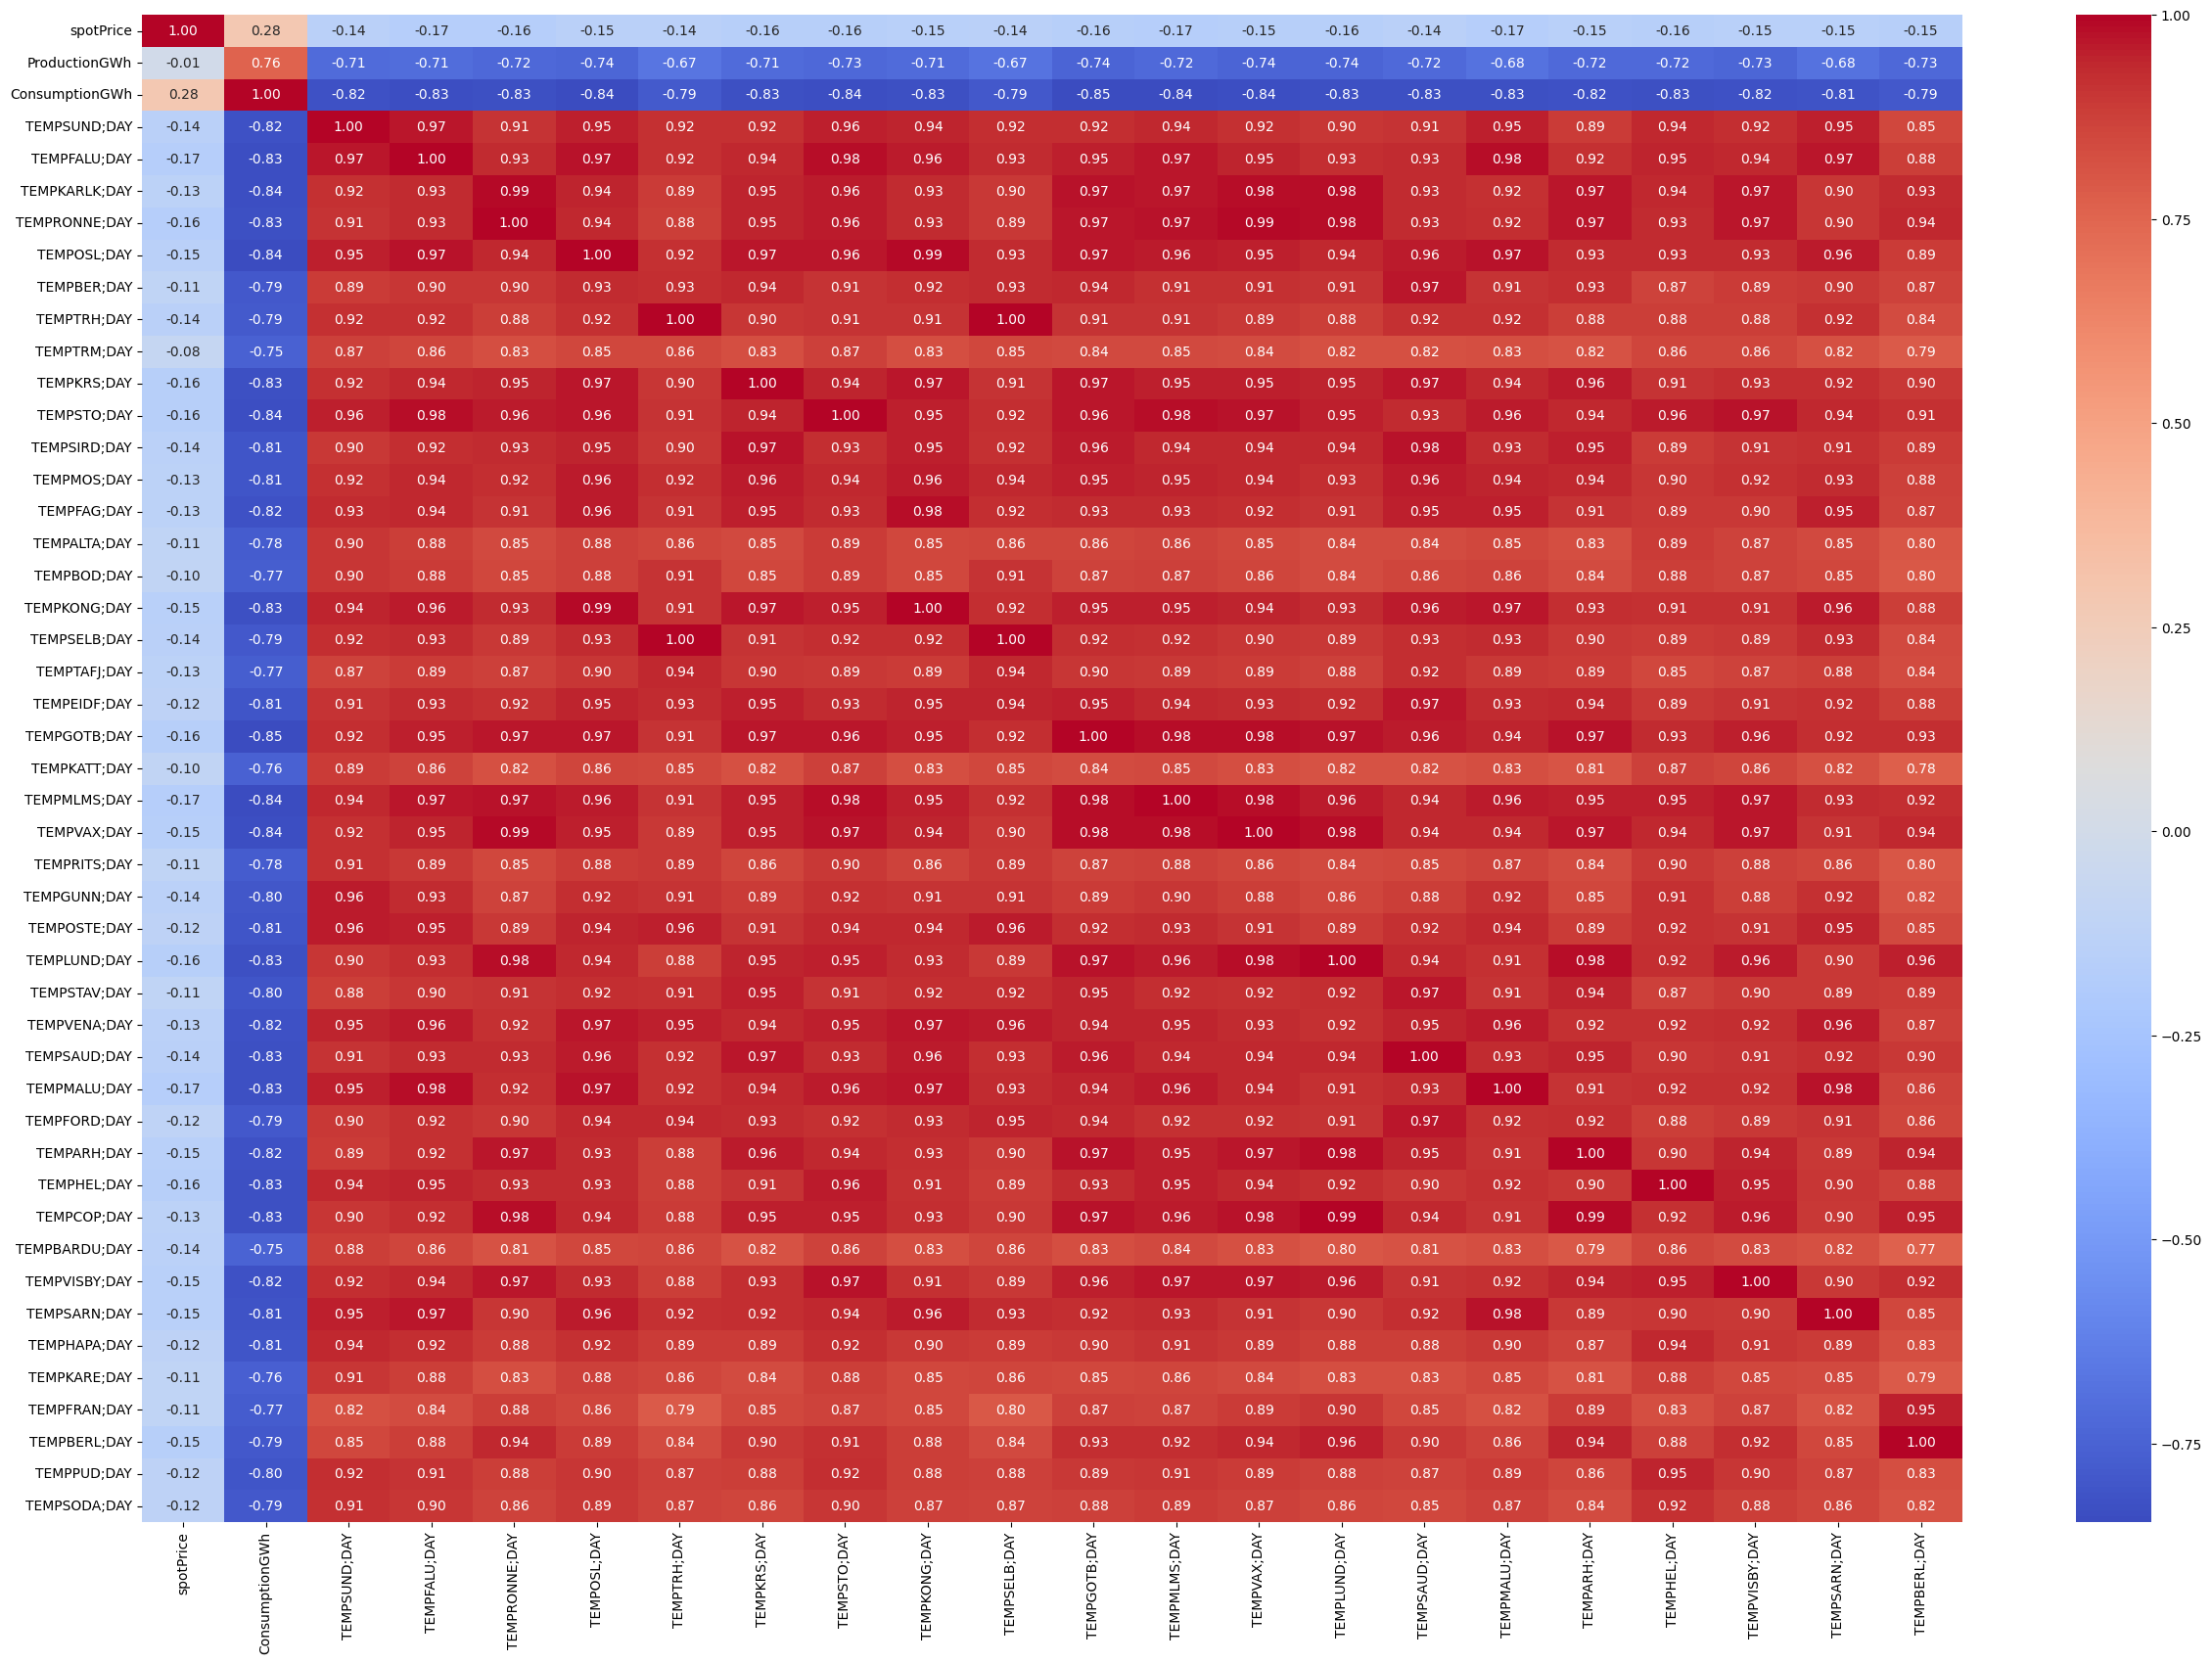

In [2]:
# full = pd.concat([spot, temp_all], axis=1)

# fig, ax = plt.subplots(figsize=(30,20))

# sns.heatmap(full.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax)

# mean_temp_full = temp_all.mean(axis=1, skipna=True)
# full = pd.concat([spot, productionGwh, cons, temp_all], axis=1)

# full_corr = full.corr()
# fig, ax = plt.subplots(figsize=(30,20))
# # sns.heatmap(full_corr, annot=True, fmt=".2f", cmap='coolwarm', ax=ax)

# full_corr_highest = full_corr.loc[:,full_corr['spotPrice'].abs() > 0.14]
# sns.heatmap(full_corr_highest, annot=True, fmt=".2f", cmap='coolwarm', ax=ax)

Text(0, 0.5, 'Spot price (SEK/MWh)')

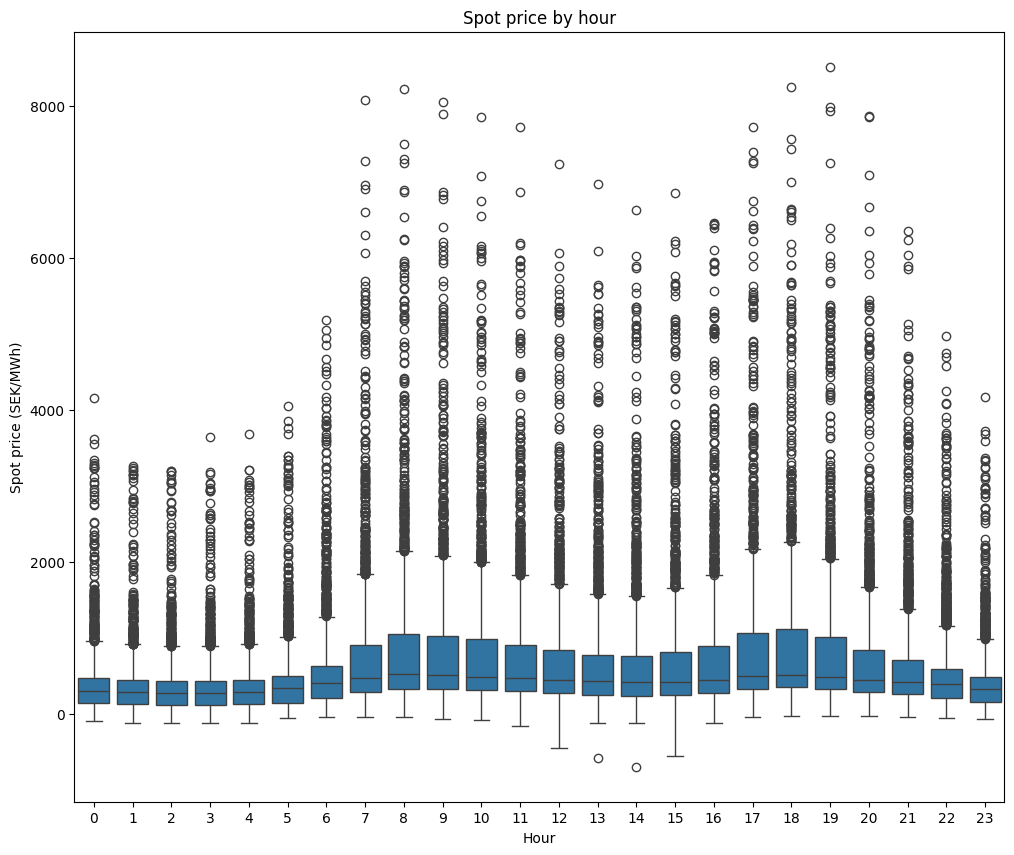

In [6]:
# Figure size and title
fig, ax = plt.subplots(figsize=(12,10))


sns.boxplot(x=spot.index.hour, y='spotPrice', data=spot)
ax.set_title('Spot price by hour')
ax.set_xlabel('Hour')
ax.set_ylabel('Spot price (SEK/MWh)')

# sns.boxplot(x = production.index.hour, y = production['wind(MWh)'],ax = ax)
# ax.set_title('Wind production by hour')
# ax.set_xlabel('Hour')
# ax.set_ylabel('Production (MWh)')

# sns.boxplot(x = production.index.year, y = production['trmMWh'],ax = ax)
# ax.set_title('Thermal power production, yearly (SE3)')
# ax.set_xlabel('Month')
# ax.set_ylabel('Production (MWh)')


<Figure size 1000x600 with 0 Axes>

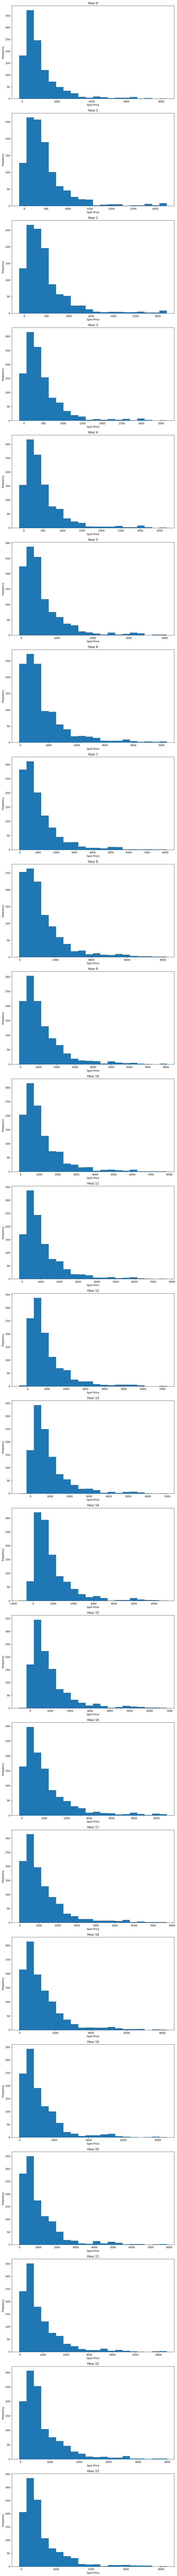

In [13]:
# sns.histplot(data=spot, x = 'spotPrice' , kde=True)

plt.figure(figsize=(10,6))

# Get the unique values in the 'Hour' column
unique_hours = spot['Hour'].unique()

# Create a subplot with n histograms
fig, axes = plt.subplots(nrows=len(unique_hours), figsize=(10, 6 * len(unique_hours)))

# Iterate over the unique hours and plot the histogram for each hour
for i, hour in enumerate(unique_hours):
    # Select the data for the current hour
    data = spot[spot['Hour'] == hour]['spotPrice']
    
    # Plot the histogram
    axes[i].hist(data, bins=20)
    axes[i].set_title(f'Hour {hour}')
    axes[i].set_xlabel('Spot Price')
    axes[i].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
consumption = pd.concat([spot, cons_gwh], axis=1)

fig, ax = plt.subplots(figsize=(30,20))

# figure title
ax.set_title('Correlation between spot price and consumption')
sns.heatmap(consumption.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax)

In [ ]:
nuclear_finland_germany = pd.concat([spot, nuclear_finland_germany_mwh], axis=1)

fig, ax = plt.subplots(figsize=(30,20))

# figure title
ax.set_title('Correlation between spot price and xx')
sns.heatmap(nuclear_finland_germany.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax)

In [ ]:
production_germany = pd.concat([spot, germany_all], axis=1)

fig, ax = plt.subplots(figsize=(30,20))

# figure title
ax.set_title('Correlation between spot price and xx')
sns.heatmap(production_germany.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax)

In [ ]:
ProductionData = pd.concat([spot, production_se1_mwh, production_se2_mwh,
                              production_se3_mwh, production_se4_mwh], axis=1)

fig, ax = plt.subplots(figsize=(30,20))

sns.heatmap(ProductionData.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax)

In [ ]:
otherdata = pd.concat([spot, otherData], axis=1)

fig, ax = plt.subplots(figsize=(30,20))

# figure title
#ax.set_title('Correlation between spot price and consumption')
sns.heatmap(otherData.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax)

In [ ]:
hydroData = pd.concat([spot, hydroReservoirs], axis=1)

fig, ax = plt.subplots(figsize=(30,20))

# figure title
ax.set_title('Correlation between spot price and consumption')
sns.heatmap(hydroData.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax)

In [ ]:
tempData = pd.concat([spot, temp_pen], axis=1)

fig, ax = plt.subplots(figsize=(30,20))

# figure title
#ax.set_title('Correlation between spot price and consumption')
sns.heatmap(tempData.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax)

<Axes: >

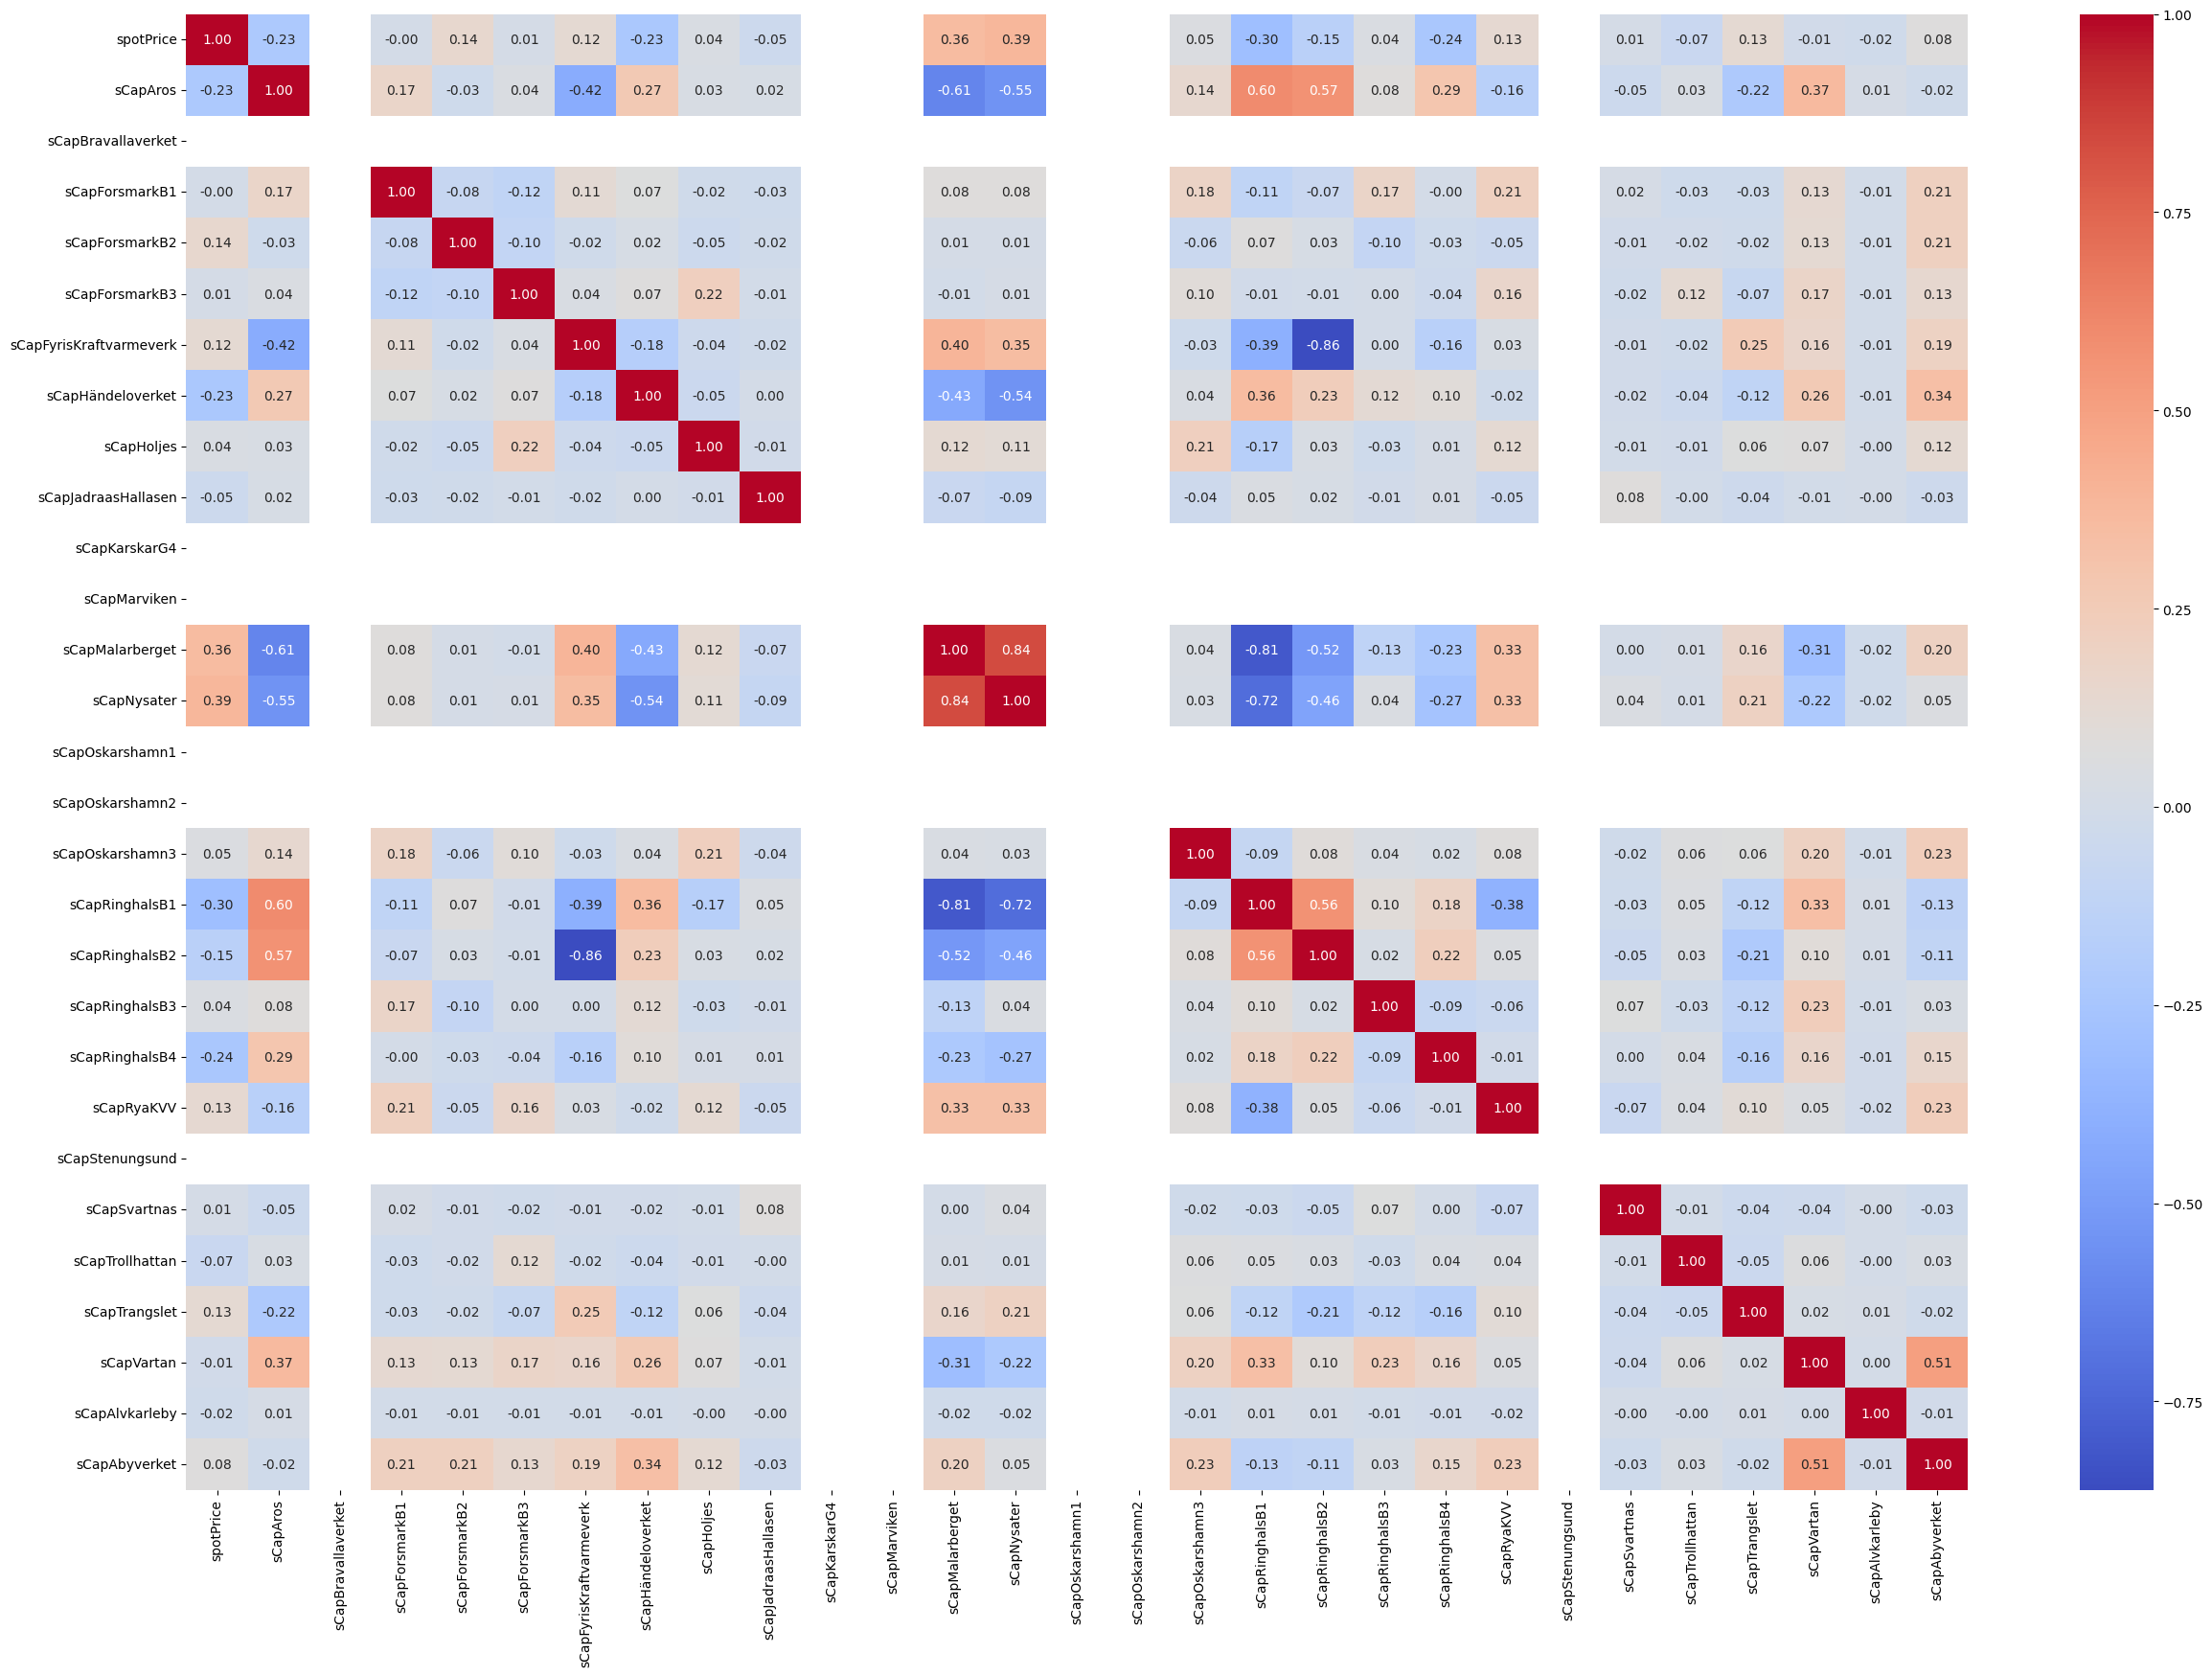

In [4]:
StationData = pd.concat([spot, statonCap], axis=1)

fig, ax = plt.subplots(figsize=(30,20))

sns.heatmap(StationData.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax)

In [ ]:
TransmissionData = pd.concat([spot, transFrom, transTo], axis=1)

fig, ax = plt.subplots(figsize=(30,20))

sns.heatmap(TransmissionData.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax)

<Axes: >

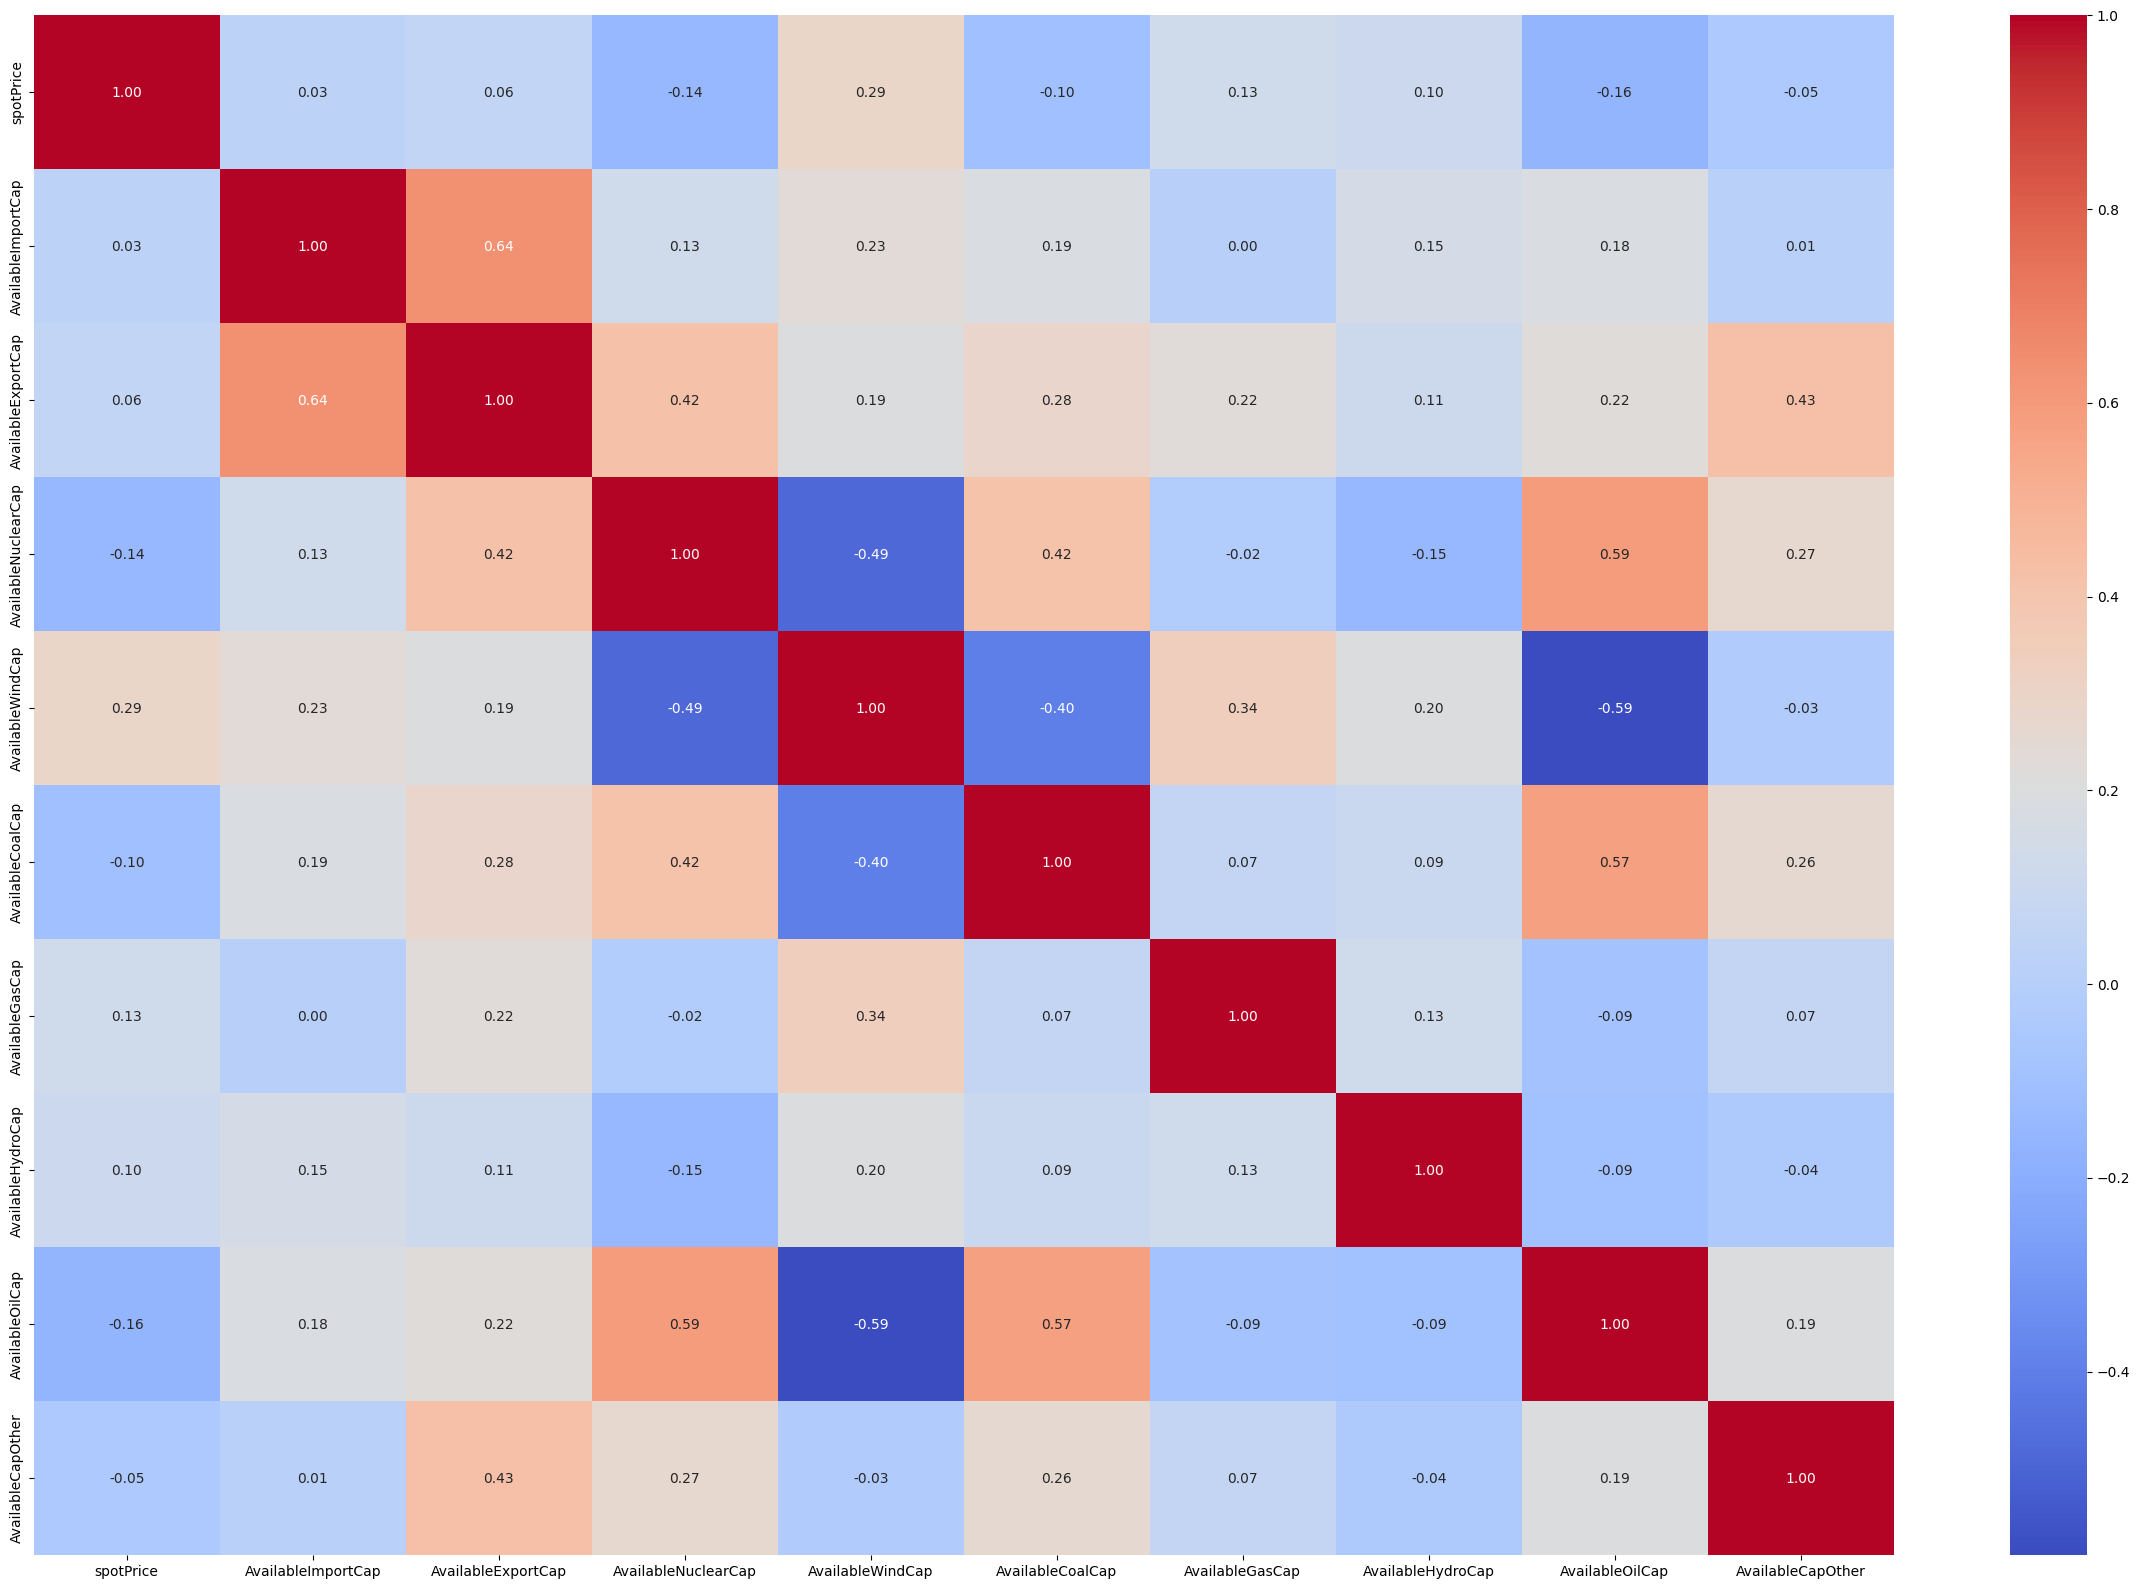

In [5]:
productionData_cap = pd.concat([spot, productionCap], axis=1)

fig, ax = plt.subplots(figsize=(30,20))

sns.heatmap(productionData_cap.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax)